<a href="https://colab.research.google.com/github/Aatika1/openai-API/blob/main/edges_nodes_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
%%capture --no-stderr
%pip install --quiet -U langgraph

In [31]:
#define state
from typing_extensions import TypedDict

class LearningState(TypedDict):
  prompt:str

In [32]:
# prompt: create an example from above LearningState

abu_state:LearningState =LearningState(prompt= "Hi this abuzar ")

In [33]:
# print(abu_state)
# print(abu_state['prompt'])
print(abu_state['prompt'] + " I am")
print(type(abu_state))

Hi this abuzar  I am
<class 'dict'>


In [34]:
#Nodes are just py functions
def node1(state:LearningState)->LearningState:
  print("Node_1 State",state)
  return{"prompt":state['prompt'] + " I am"}

def node2(state:LearningState)->LearningState:
  print("Node_2",state)
  return{"prompt":state["prompt"]+" Abuzar "}

def node3(state:LearningState)->LearningState:
  print("Node_3",state)
  return{"prompt": state["prompt"]+" I am learning Agentic AI from PIAIC"}


In [35]:
#edges connect to nodes and graph construct

from IPython.display import Image, display # Preview Graph

from langgraph.graph import StateGraph,START,END
from langgraph.graph.state import CompiledStateGraph # type

builder:StateGraph=StateGraph(state_schema=LearningState)

In [36]:
print(type(builder))

<class 'langgraph.graph.state.StateGraph'>


In [37]:
# Nodes
builder.add_node("node1",node1)
builder.add_node("node2",node2)
builder.add_node("node3",node3)

In [38]:
# edges logic
builder.add_edge(START,"node1")
builder.add_edge("node1","node2")
builder.add_edge("node2","node3")
builder.add_edge("node3",END)

In [39]:
graph:CompiledStateGraph=builder.compile()

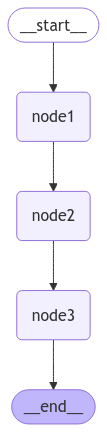

In [40]:
# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [41]:
#Graph Invocation
graph.invoke({"prompt":"hi"})

Node_1 State {'prompt': 'hi'}
Node_2 {'prompt': 'hi I am'}
Node_3 {'prompt': 'hi I am Abuzar '}


{'prompt': 'hi I am Abuzar  I am learning Agentic AI from PIAIC'}

#Task: In Nodes Use LLM == GoogleChatModel in Langchain

In [42]:
%pip install -q -U langchain
%pip install -q -U langchain-google-genai


In [75]:
from google.colab import userdata
google_api_key = userdata.get('GEMINI_API_KEY')

In [76]:
from langchain_google_genai import ChatGoogleGenerativeAI

# Initialize an instance of the ChatGoogleGenerativeAI with specific parameters
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",  # Specify the model to use
    api_key=google_api_key,     # Provide the Google API key for authentication
)

In [77]:
# Import the AIMessage class currently will be used for typing
from langchain_core.messages.ai import AIMessage

ai_msg: AIMessage = llm.invoke("Hi?")

In [78]:
print(ai_msg.content)

Hi there! How can I help you today?



In [86]:
from typing_extensions import TypedDict

class LLMAgent(TypedDict):
    prompt: str
    output: str

In [87]:
def node_1(state: LLMAgent):
    print("---Node 1---", state)
    prompt = state["prompt"]
    ai_msg: AIMessage = llm.invoke(prompt)
    return {"output": ai_msg.content}

In [88]:
Abuzar = node_1(LLMAgent(prompt="Hello I am Abuzar"))
print(Abuzar)

---Node 1--- {'prompt': 'Hello I am Abuzar'}
{'output': "Hello Abuzar, it's nice to meet you! How can I help you today?\n"}


In [89]:
from IPython.display import Image, display # Preview Graph

from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph # type

# Build graph
builder: StateGraph = StateGraph(state_schema=LLMAgent)

# Define Nodes
builder.add_node("chatbot", node_1)

# Add Edges
builder.add_edge(START, "chatbot")
builder.add_edge("chatbot", END)

# Compile Graph
graph: CompiledStateGraph = builder.compile()

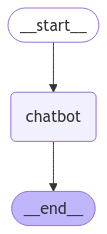

In [90]:
# view
display(Image(graph.get_graph().draw_mermaid_png()))

In [98]:
AI=graph.invoke({"prompt":"What is AI"})

---Node 1--- {'prompt': 'What is AI'}


In [99]:
print(AI)

{'prompt': 'What is AI', 'output': 'Artificial intelligence (AI) is a broad field encompassing the development of computer systems capable of performing tasks that typically require human intelligence.  These tasks include things like:\n\n* **Learning:** Acquiring information and rules for using the information.\n* **Reasoning:** Using rules to reach approximate or definite conclusions.\n* **Problem-solving:** Finding solutions to complex situations.\n* **Perception:** Interpreting sensory information like images, sound, and text.\n* **Language understanding:** Processing and generating human language.\n\nAI systems achieve these capabilities through various techniques, including:\n\n* **Machine learning (ML):** Algorithms that allow systems to learn from data without explicit programming.  This includes subfields like deep learning (using artificial neural networks with many layers) and reinforcement learning (learning through trial and error).\n* **Natural language processing (NLP):*